MULTI 
LINEAR REGRESSION

In [2]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import scikit-learn libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [3]:
#one feature one target

df = pd.read_excel('financial_loan_data.xlsx')

Predict how much loan can customer get based on annual income


In [4]:
df.head(10)


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,2021-07-17,2021-03-16,2021-08-12,...,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,...,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,2021-06-11,2021-07-14,2021-07-14,...,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,...,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,2021-02-09,2021-03-16,2021-03-16,...,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


In [5]:
#Define feature and target variable

X_Var = ['annual_income', 'dti' , 'int_rate', 'total_acc']   # feature always take 2d structured if we send annual income only its series
Y_Var = 'loan_amount'

CHEKING LINEARITY BETWEEN FEATURE AND TARGET VARIBLE

In [6]:
# we used to check linearity being on simple linear regression

In [7]:
X = df[X_Var]  # here feature varible is now on 2d doesnt need to change it into that
Y = df[Y_Var]

TRAIN AND TEST

In [8]:
X_train , X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size = 0.2 , random_state = 42
)  # 42 is random number , we can have there any number , it just assures that 20 test 80 train

In [9]:
print(X_train.shape)
print(Y_train.shape)


(30860, 4)
(30860,)


Fit Data in Model

In [10]:
model = LinearRegression()

In [11]:
#Training data 
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
Y_pred =  model.predict(X_test)

In [13]:
Y_pred

array([16153.72228634, 16137.33727073,  8914.52003424, ...,
       10459.96858595,  9188.77437781, 11117.78731147])

In [14]:

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f'Slope : {beta_0}')
print(beta_1)

Slope : -926.7342253337738
0.021160973009356054


CALCULATE METRICS

In [15]:
rmse =  np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

In [16]:
print(f'RMSE : {rmse}')  #best when less than 100000
print(f'R2 score : {r2}')  #best when between 40-50 -> its only 9%



RMSE : 6620.026122182002
R2 score : 0.21277508934701395


PLOT USING SCATTER PLOT

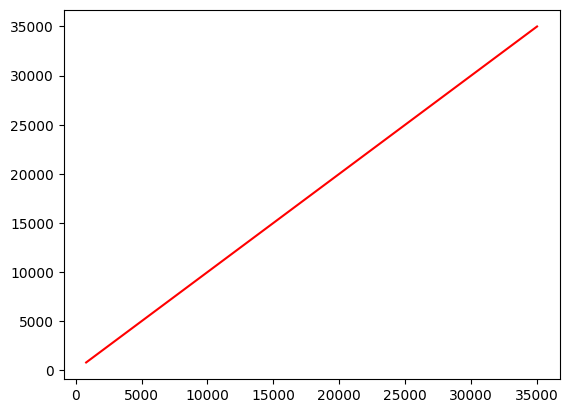

In [ ]:
# # now it shows error when plotting
# # we have 4 feature , one target 


# '''
# single regression
# X-axis -> featue (one)
# Y_axis -> target  (one)

# multi regression 
# X-axis ->  actual value (Y test)
# Y-axis ->  pred values (Y pred)


# '''

# sns.scatterplot(x = Y_test.values.flatten() , y = Y_pred.flatten(), )
# #plt.plot([horizontal], [vertical])

# its like ([10,100][10,100])
# it takes 10,10 and 100,100
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], color='red')

In [18]:
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
X

,annual_income,dti,int_rate,total_acc
0,30000.0,0.0100,0.1527,4
1,48000.0,0.0535,0.1864,4
2,50000.0,0.2088,0.1596,11
3,42000.0,0.0540,0.1065,9
4,83000.0,0.0231,0.0603,28
...,...,...,...,...
38571,100000.0,0.1986,0.1299,33
38572,50000.0,0.0458,0.1349,18
38573,65000.0,0.1734,0.1749,20
38574,368000.0,0.0009,0.1825,9


Predict New DataPoints

In [20]:
new_data= {
    'annual_income' : [100000,300000,1000000],
    'dti' : [.010,0.02,0.04],
    'int_rate' : [0.14,0.12,0.13],
    'total_acc' : [2,3,4]
}


# it is feature , feature should be always on 2d
# so convert it

In [21]:
X_new = pd.DataFrame(new_data) # changes it into 2d
X_new

,annual_income,dti,int_rate,total_acc
0,100000,0.01,0.14,2
1,300000,0.02,0.12,3
2,1000000,0.04,0.13,4


In [22]:
Y_new_pred = model.predict(X_new)
Y_new_pred

array([10183.60120684, 13320.08473973, 28901.63210812])

In [23]:
X_new['Predicted_loan_amount'] = Y_new_pred
X_new

,annual_income,dti,int_rate,total_acc,Predicted_loan_amount
0,100000,0.01,0.14,2,10183.601207
1,300000,0.02,0.12,3,13320.084740
2,1000000,0.04,0.13,4,28901.632108
